### Module 4: Machine Learning – Python Hands-On Workbook

Introduction to machine learning

1. Supervised Learning: Model learns from labeled data

- Regression -> predict continuos values (e.g. house price)
- classification ->predic categories (eg. spam email)

2. Unsupervised Learning: Model finds patterns in unlabled data 
- Clustering - grouping simialr items
-Dimensionality reduction -> simplify data 

3. Key Steps in ML 
- Collect data -> clean/prepare -> split (train/test) -> train model -> evaluation -> predict 


Part 2: Supervised Learning – Regression

Exercise 1: Predict house prices using linear regression.

Dataset: House sizes (1000s sqft) and prices (1000s $)

Predicted price for 6k sqft house: 400.0


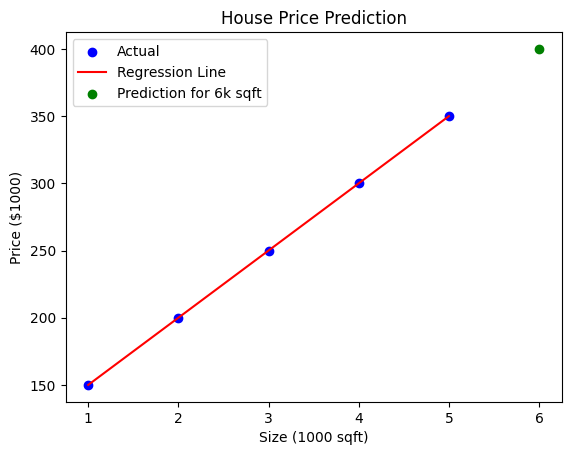

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X = np.array([[1],[2],[3],[4],[5]])  # House size in 1000 sqft
y = np.array([150, 200, 250, 300, 350])  # Price in $1000

# Model
model = LinearRegression()
model.fit(X, y)

# Prediction
predicted = model.predict([[6]])
print("Predicted price for 6k sqft house:", predicted[0])

# Visualization
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(6, predicted, color='green', label='Prediction for 6k sqft')
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price ($1000)")
plt.title("House Price Prediction")
plt.legend()
plt.show()


Exercise 2: Predict prices for houses with sizes [7, 8, 9].

In [5]:
predictions = model.predict([[7],[8],[9]])
print("Predicted prices:", predictions)

Predicted prices: [450. 500. 550.]


Mini Project 1:

Dataset: Random 50 house sizes (1000–5000 sqft) and prices with some noise

Task: Train a linear regression model, predict new house prices, plot results

Predictions: [297.39986574 346.95300962]


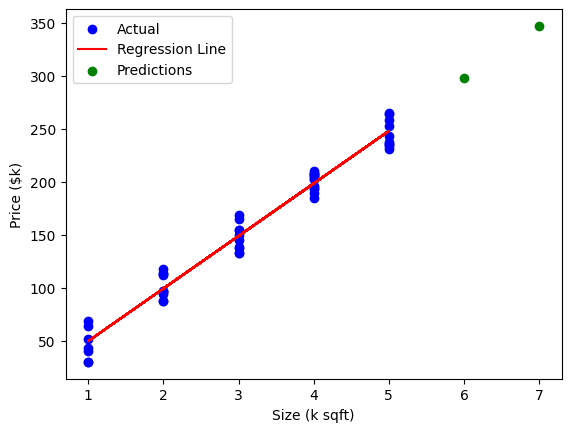

In [6]:
# Generate dataset 
np.random.seed(42)
X = np.random.randint(1,6, size=(50,1))
y = X.flatten()*50 +np.random.randint(-20,20,50)
#Train model 
model = LinearRegression()
model.fit(X,y)

# Predict
X_new = np.array([[6],[7]])
y_pred = model.predict(X_new)
print("Predictions:", y_pred)

#Plot 
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(X_new, y_pred, color='green', label='Predictions')
plt.xlabel("Size (k sqft)")
plt.ylabel("Price ($k)")
plt.legend()
plt.show()

Part 3: Supervised Learning – Classification

Concept: Predict discrete categories (labels).

Exercise 3: Predict if a student passed (score ≥50).

In [8]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Dataset
data = {"Score":[45,50,70,30,80,55,60,40,90,35],
        "Passed":[0,1,1,0,1,1,1,0,1,0]}

df = pd.DataFrame(data)

# Split
X = df[["Score"]]
y = df["Passed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

#train
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Predict
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)
print("Accuracy:", f"{accuracy_score(y_test, y_pred):.2f}")

Predictions: [1 0 1]
Accuracy: 0.67


Exercise 4: Predict pass/fail for new scores [65, 42, 78].

In [9]:
new_scores = pd.DataFrame({"Score":[65,42,78]})
predictions = clf.predict(new_scores)
print("Predicted pass/fail:", predictions)


Predicted pass/fail: [1 0 1]


Mini Project 2:

Dataset: Students with Hours_Studied and Passed (0/1)

Task: Train classifier, predict outcomes for new students, visualize results

Part 4: Unsupervised Learning – Clustering

Exercise 5: KMeans clustering with 2D points.

Labels: [0 0 0 1 1 1]
Centers:
 [[ 1.  2.]
 [10.  2.]]


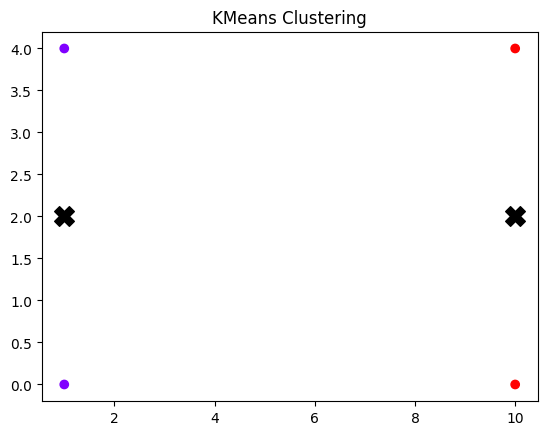

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

# Points
points = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

#model 
kmeans = KMeans(n_clusters= 2, random_state = 42)
kmeans.fit(points)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Labels:", labels)
print("Centers:\n", centers)

# Plot
plt.scatter(points[:,0], points[:,1], c=labels, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], color='black', marker='X', s=200, label='Centers')
plt.title("KMeans Clustering")
plt.show()

Part 5: Model Evaluation

Concepts Covered:

Regression → R², MAE, MSE

Classification → Accuracy, Precision, Recall, F1-score, Confusion Matrix

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))


MSE: 7241206.539868229
R²: -29568259.037795275


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Exercise 7: Evaluate classification model from Part 3.

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i